In [1]:
import numpy as np

In [5]:
# HW7.2. Linear Congruential Generators

a=4; c=1; m=5
seed = 1
x = []

x.append(seed)
x.append((a*seed + c) % m)
while x[-1] != seed:
    x.append( (a*x[-1] + c) % m )
print(x)


[1, 0, 1]


In [7]:
# HW7.5. Monte Carlo Estimation
points = [(0,0,1),(0,np.pi/2,1),(0.6,np.pi/8,0.5),(0.1,0.6,0.5)]
counter = 0
for point in points:
    x,y,z = point
    if(
        (0<=x<=1 and 0<=y<=1 and 0<=z<=1) and
        (x**2 + np.sin(y) <= z) and
        (x-z+np.e**y <=1)
    ):
        counter += 1
print(counter)

1


In [13]:
# HW7.7. Monte Carlo Error Practice

# Error of Monte Carlo proportional to 1/sqrt(N)
samples  = 100
abs_error = 3
new_samples = 1000000

student_samples = 100

upper_bound = abs_error + abs_error*np.sqrt(samples/new_samples)
lower_bound = abs_error - abs_error*np.sqrt(samples/new_samples)
print(upper_bound,lower_bound)

3.03 2.97


In [15]:
# HW7.8. Monte Carlo convergence

# Error(N) = C/sqrt(N) -> C = Error(N)*sqrt(N)

error_now = 10**(-1)
error_target = 10**(-6)

points_now = 1000000
points_target = (error_now*np.sqrt(points_now)/error_target)**2

print(points_target)

1e+16


[4.       3.2      2.96     3.148    3.1516   3.14212  3.140608]


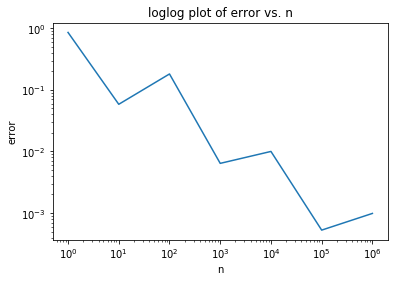

In [25]:
# HW7.9. Calculating pi using Monte Carlo

# Input:
xs = np.random.rand(10**6)
ys = np.random.rand(10**6)
# print(xs[:10].shape[0])

import numpy as np
import matplotlib.pyplot as plt

# Part I
def calculate_pi(x, y):
    N = x.shape[0]
    r = 1.0
    pi = 4/N * np.sum( (x**2 + y**2) <= r**2)
    return pi

# Part II
pi = []
N = [10**n for n in range(7)]
for n in N:
    x = xs[:n]
    y = ys[:n]
    pi.append(calculate_pi(x,y))
pi = np.array(pi)
print(pi)

error = abs(pi - np.pi)
# Save plot for grading
plt.figure()
plt.title('loglog plot of error vs. n')
plt.loglog(N, error)
plt.xlabel('n')
plt.ylabel('error')
plot = plt.gca()

23


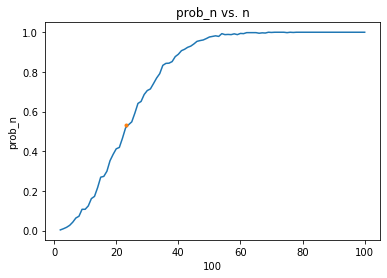

In [46]:
# HW7.10. The Birthday Problem

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def genroom(n):
    return np.random.randint(1,366, n)

def duplicate_birthdays(n):
    # Generate 1000 simulations of rooms (with the birthdays of n people in each room)
    # Compute the number of rooms with duplicate birthdays.
    # Returns the number of rooms with duplicate birthdays
    num = 0
    for _ in range(1000):
        room = genroom(n)
        room = np.sort(room)
        for index, birthday in enumerate(room):
            if birthday == room[(index+1)%n]:
                num += 1
                break
    return num

# Part 1
prob_n = []
for n in range(2,101):
    # call function duplicate_birthdays(n)
    # update the array prob_n
    prob_n.append(duplicate_birthdays(n)/1000)
prob_n = np.array(prob_n)

# Part 2
# Estimate perc_50
try:
    perc_50 = np.argwhere(prob_n > 0.5).item(0)+2 # prob_n start with n=2
    print(perc_50)
except:
    perc_50 = None
    print(perc_50)

# Part 3
# Plot prob_n
plt.figure()
plt.plot(range(2,101), prob_n)
# plt.plot(perc_50,prob_n[perc_50-1],'.') # print the perc_50 in the figure
plt.xlabel(n)
plt.ylabel('prob_n')
plt.title('prob_n vs. n')
# Save plot for grading
plot = plt.gca()

In [62]:
# HW7.11. Calculating a Volume of Intersection

import numpy as np

## Part 1
def insideCylinders(pos,r):
    x, y, z = pos
    # Return true if the point is inside the Steinmetz solid
    # write some code here
    if ((y**2 + z**2 <= r**2) and (x**2 + y**2 <= r**2)):
        return True
    else:
        return False

## Part 2
def prob_inside_volume(N,r):
    # Calculate the probability that any point is inside the Steinmetz solid
    random_samples = np.random.rand(N,3) * (2*r) - r    # range from -r to r
    num_inside_volume = 0
    for point in random_samples:
        if insideCylinders(point, r):
            num_inside_volume += 1
    prob = num_inside_volume/N
    return prob

"""
def prob_inside_volume(N,r):
    x = np.random.rand(N)*2*r-r
    y = np.random.rand(N)*2*r-r
    z = np.random.rand(N)*2*r-r
    point = (((x**2+y**2) <= r*r) & ((z**2+y**2) <= r*r))
    count_point = point.sum()
    return count_point/N
"""

## Part 3
N = 1000
r = 1
# Determine approximated volume
volume_approx = prob_inside_volume(N,r) * (2*r)**3

# Use reference volume to double check answer.
reference_volume = 16/3*r**3
abs_error = abs(volume_approx-reference_volume)
print(abs_error)

0.19733333333333292


In [14]:
import numpy as np
def prob_inside_volume(N,r):
    x = np.random.rand(N)*2*r-r
    y = np.random.rand(N)*2*r-r
    z = np.random.rand(N)*2*r-r
    point = (((x**2+y**2) <= r*r) & ((z**2+y**2) <= r*r))
    count_point = point.sum()
    return count_point/N

prob_inside_volume(1000,2)

0.651